In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import numpy as np

url= "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv"
df = pd.read_csv(url)

In [5]:
df = df.drop(columns=['MODELYEAR', 'VEHICLECLASS', 'MODEL', 'MAKE', 'TRANSMISSION', 'FUELTYPE'])
df.corr()
df = df.drop(columns=['CYLINDERS', 'FUELCONSUMPTION_CITY', 'FUELCONSUMPTION_COMB', 'FUELCONSUMPTION_HWY'])
df

,ENGINESIZE,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2.0,33,196
1,2.4,29,221
2,1.5,48,136
3,3.5,25,255
4,3.5,27,244
...,...,...,...
1062,3.0,24,271
1063,3.2,25,264
1064,3.0,24,271
1065,3.2,25,260


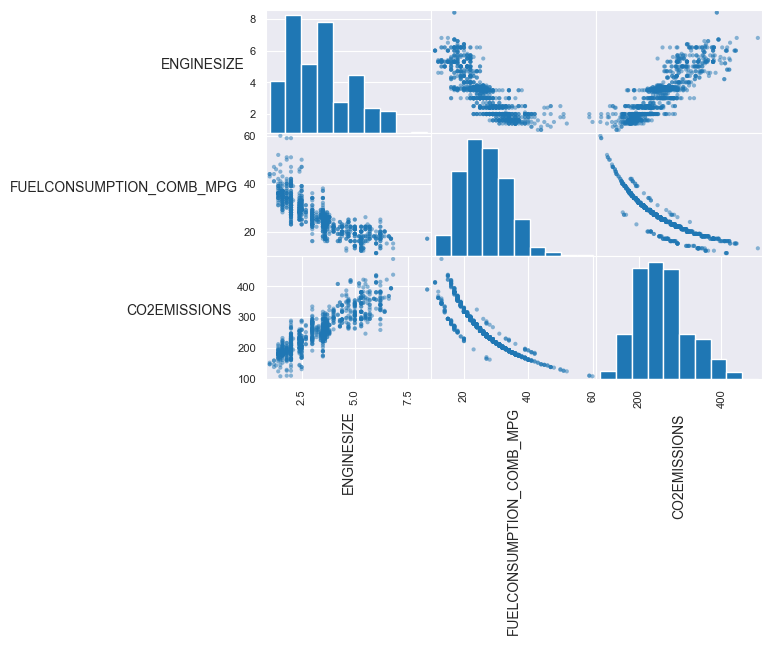

In [6]:
axes = pd.plotting.scatter_matrix(df)
# rotate labels to see them clearly
for ax in axes.flatten():
    ax.xaxis.label.set_rotation(90)
    ax.yaxis.label.set_rotation(0)
    ax.yaxis.label.set_ha('right')

plt.show()

In [7]:
# : means all row from [0,1] if we want all from the first and second column. Or [:, [0:3]] if we want all rows from the first, second, and third column for example.
X = df.iloc[:, [0,1]]
y = df.iloc[:, [2]]

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scalar = StandardScaler()
scalar.fit(X_train) # This will learn μ and σ from our X_train.

# This applies x^{n}_{i_{new}} = \frac{x^{n}_{i} - \mu_{i}} {\sigma_{i}} to each column. it computes μ and σ for each column and does this calculation.
X_train_std = scalar.transform(X_train)
X_test_std = scalar.transform(X_test)

model = LinearRegression()
model.fit(X_train_std, y_train)

intercept = model.intercept_[0]
coefficient = model.coef_[0]
print(F"intercept: {intercept}, coefficients: {coefficient}")

intercept: 257.2567409144197, coefficients: [ 25.24920416 -36.60577657]


,ENGINESIZE,FUELCONSUMPTION_COMB_MPG
333,1.4,36
106,4.4,22
585,3.0,29
55,3.0,25
213,5.3,17
...,...,...
330,3.6,24
466,2.4,28
121,4.4,20
1044,1.8,33


In [9]:
# we can extract the found μ and σ values from our scalar
mean = scalar.mean_
# the standard deviation, σ, is the square root of the variance, σ².
standard_deviation = np.sqrt(scalar.var_)

# If we want to know what our intercept and coefficients would have been without standardising our result, we can do the following calculations:
original_intercept = intercept - np.sum((mean * coefficient) / standard_deviation)
original_coefficient = coefficient / standard_deviation


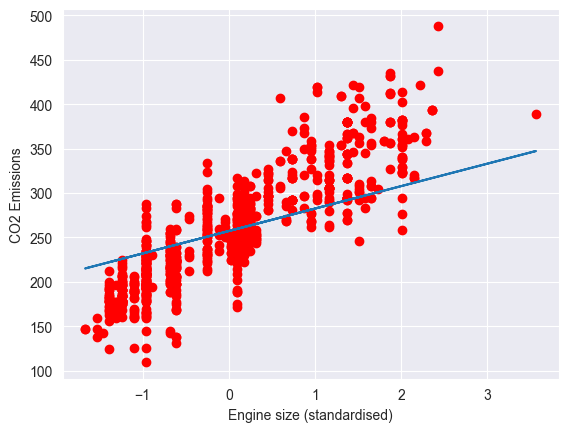

In [44]:
# Since we have two independent variables, if we plot them both together, we will get a 3d plot, which can be quite hard to interpret, since we are finding a plane of best fit. Instead, we can look at a vertical slice of the 3d plot and plot each variable separately as a line of best fit. When doing this, we have to extract the corresponding variable in the regression line equation. In the code in this cell, we are plotting engine size to CO2 Emissions. To do this, we make a scatter plot of engine size to CO2 Emissions, then plot the line. This line has the standardised intercept we found, and the FIRST coefficient, since this coefficient corresponds to engine size, i.e., y = w_{0} + enginesize * w_{1} + fuel_consumption_comb_mpg * w_{2}. So we extract w_{1}.

plt.scatter(X_train_std[:, 0], y_train, color = 'red')
plt.plot(X_train_std[:, 0], intercept + coefficient[0] * X_train_std[:, 0])
plt.xlabel("Engine size (standardised)")
plt.ylabel("CO2 Emissions")
plt.show()

Text(0, 0.5, 'CO2 Emissions')

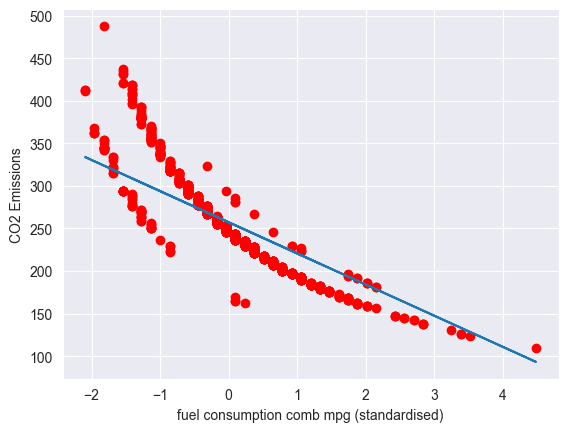

In [51]:
# Now we want to plot fuel_consumption_comb_mpg against CO2_emissions. We now need to extract the second coefficient corresponding to this variable.
plt.scatter(X_train_std[:, 1], y_train, color = 'red')
plt.plot(X_train_std[:, 1], intercept + coefficient[1] * X_train_std[:, 1])
plt.xlabel("fuel consumption comb mpg (standardised)")
plt.ylabel("CO2 Emissions")

In [ ]:
# Evidently, our solution is poor, since we are trying to fit a 2d plane, to a non-planar surface, maybe a warped or curved surface which would require a model other than LinearRegression().